In [2]:
import numpy as np
import pandas as pd

from pr import run_simulations, pr_curve, pr_quantile_binom, pr_quantile_hypergeom
from scipy.stats import binom, hypergeom
from plotnine import *

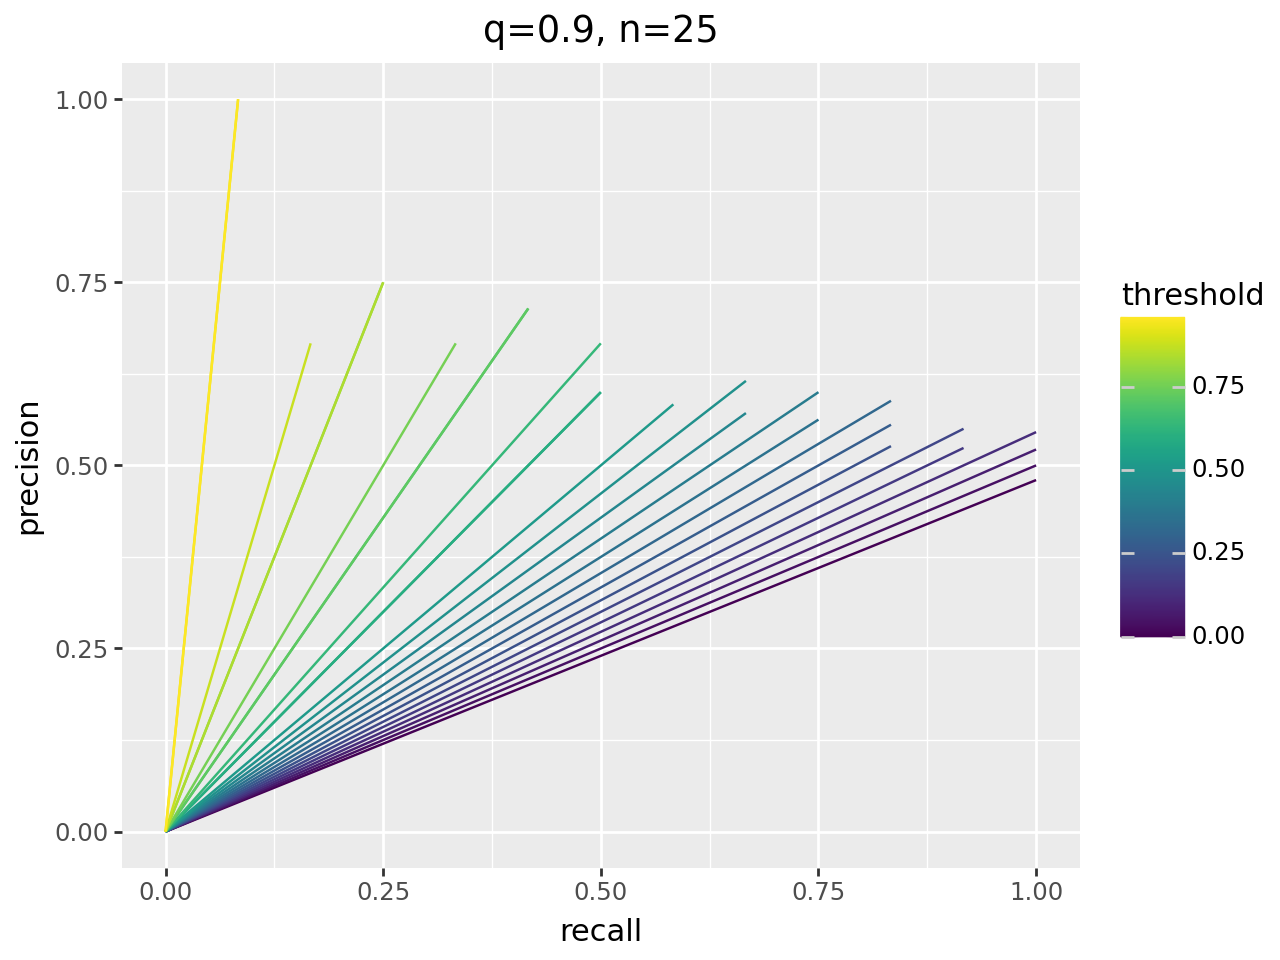

In [3]:
n = 25
prec, rec, th = pr_quantile_hypergeom(n)
low = np.zeros(n)

df = pd.DataFrame({'precision': np.concatenate((prec, low)), 'recall': np.concatenate((rec, low)), 'threshold': np.tile(th, 2)})
g = ggplot(df) + aes('recall', 'precision', color='threshold', group='threshold') + geom_line() 
g = g + ggtitle(f'q={.9}, n={n}')
g

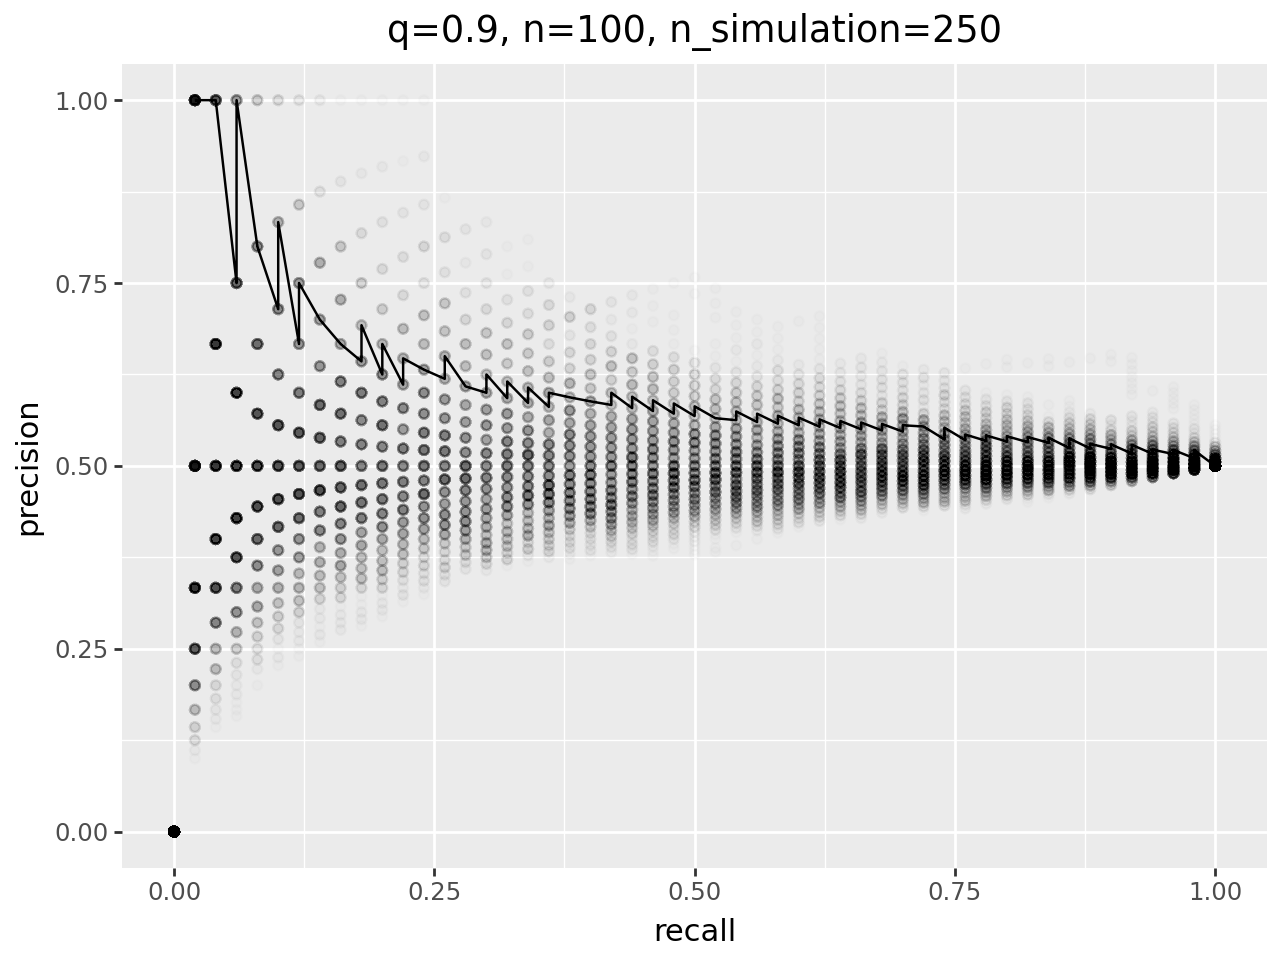

In [4]:
n = 100
prec_q, rec_q, _ = pr_quantile_hypergeom(n)

n_sim = 250
y_true, y_scores = run_simulations(n_sim, n)
prec_sim, rec_sim, _ = np.hstack([pr_curve(y_true, s) for s in y_scores])

df = pd.DataFrame({'precision': prec_q, 'recall': rec_q})
df_sim = pd.DataFrame({'precision': prec_sim, 'recall': rec_sim})
g = ggplot() + aes('recall', 'precision') + geom_line(data=df) + geom_point(data=df_sim, alpha=0.01)
g = g + ggtitle(f'q={.9}, n={n}, n_simulation={n_sim}')
g

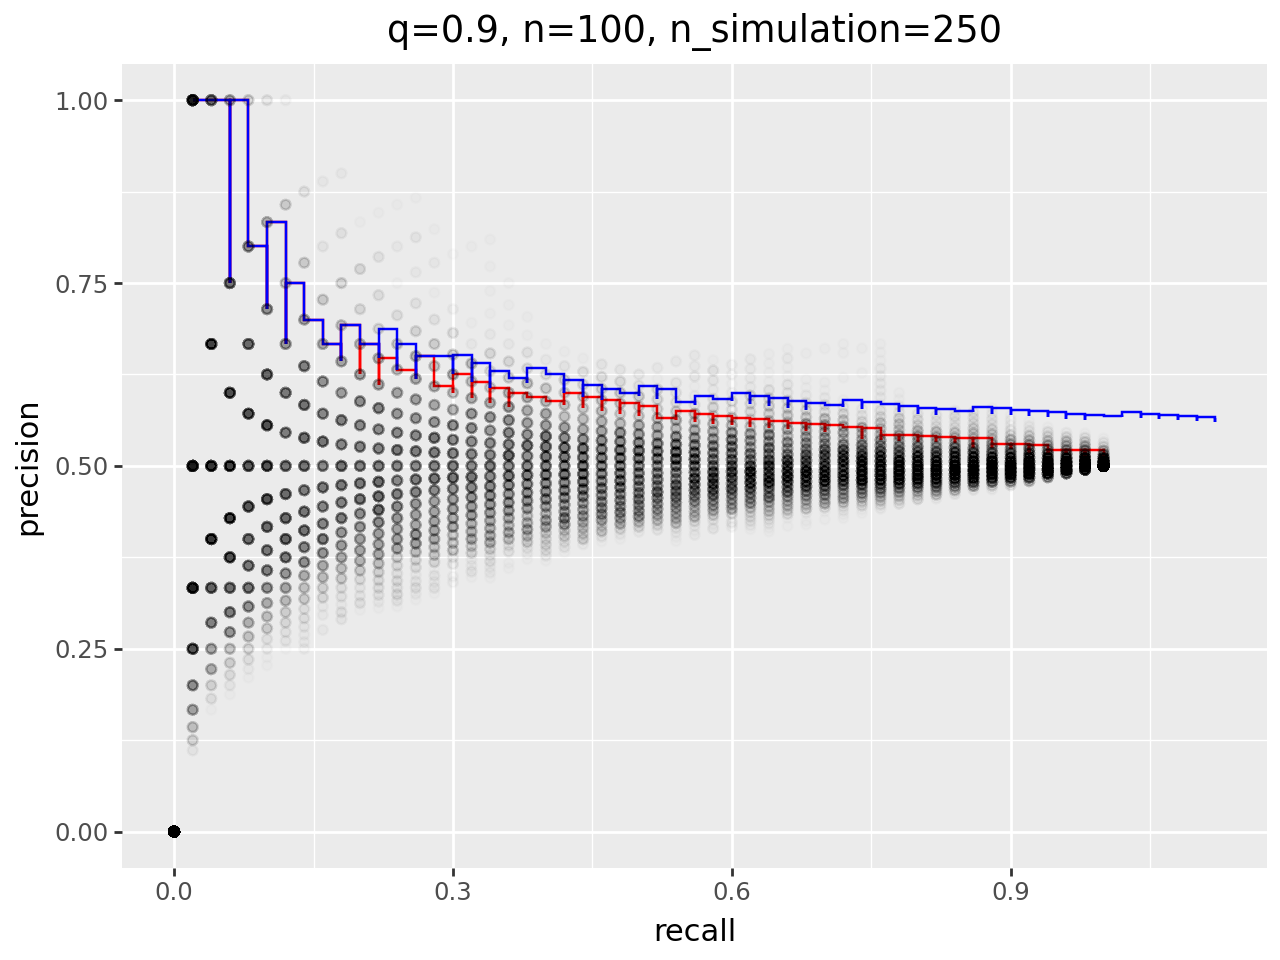

In [14]:
n = 100
h0_acc = .0
prec_q, rec_q, _ = pr_quantile_hypergeom(n)
prec_qb, rec_qb, _ = pr_quantile_binom(n)

n_sim = 250
y_true, y_scores = run_simulations(n_sim, n, h0_acc=h0_acc)
prec_sim, rec_sim, _ = np.hstack([pr_curve(y_true, s) for s in y_scores])

df = pd.DataFrame({'precision': prec_q, 'recall': rec_q})
dfb = pd.DataFrame({'precision': prec_qb, 'recall': rec_qb})
df_sim = pd.DataFrame({'precision': prec_sim, 'recall': rec_sim})

g = ggplot() + aes('recall', 'precision') 
g = g + geom_step(data=df, color='red') + geom_step(data=dfb, color='blue') + geom_point(data=df_sim, alpha=0.01)
g = g + ggtitle(f'q={.9}, n={n}, n_simulation={n_sim}')
g